In [5]:
import numpy as np
from keras.layers import Dense, Dropout,BatchNormalization,Activation,Input,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential,model_from_json

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import keras
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from PIL import Image
from PIL.JpegImagePlugin import JpegImageFile
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
np.random.seed(3)
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        k = len(self.losses)
        if(k!=0):
            self.losses.append((logs.get('loss')+self.losses[k-1]*k)/(k+1))
        else:
            self.losses.append(logs.get('loss'))


DATA_DIR = "/content/drive/DL/faces_large"

In [8]:
train_datagen = ImageDataGenerator().flow_from_directory(directory=DATA_DIR+"//"+"train",target_size=(96,96),color_mode='rgb',
                                                         classes=["AK","FR","Noise","SGV", "SK","SM", "SP"],class_mode="categorical", batch_size=32)

Found 1009 images belonging to 7 classes.


In [15]:
#val_datagen = ImageDataGenerator().flow_from_directory(directory=DATA_DIR+"//"+"val",target_size=(224,224),color_mode='rgb',
#                                                         classes=["AK","FR","Noise","SGV", "SK","SM", "SP"],class_mode="categorical", batch_size=32)
test_datagen = ImageDataGenerator().flow_from_directory(directory=DATA_DIR+"//"+"test",target_size=(96,96),color_mode='rgb',
                                                        classes=["AK","FR","Noise","SGV", "SK","SM", "SP"], class_mode="categorical",batch_size=32)                                                   

Found 1462 images belonging to 7 classes.


In [0]:

model_json = encoder.to_json()
with open("/content/drive/DL/mini/encoder.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
encoder.save_weights("/content/drive/DL/mini/encoder.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import initializers

visible = Input(shape=(96,96,3))

x = Conv2D(32, kernel_size=3, activation='relu',padding="same")(visible)

x = Conv2D(32, kernel_size=3, activation='relu',padding="same")(x)

x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=3, activation='relu',padding="same")(x)

x = Conv2D(64, kernel_size=3, activation='relu',padding="same")(x)


x = Conv2D(64, kernel_size=3, activation='relu',padding="same")(x)

x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, kernel_size=3,activation='relu',padding="same")(x)


x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(256, kernel_size=3,activation='relu',padding="same")(x)


x = MaxPooling2D(pool_size=(2, 2))(x)


x = Flatten()(x)
x = Dense(100)(x)

x = Activation('relu')(x)

x = Dropout(0.6)(x)


output = Dense(7, activation='softmax')(x)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 48, 48, 64)        36928     
__________

In [22]:

model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')



loss_acc = model.fit_generator(generator=train_datagen,validation_data=test_datagen,epochs=15)

Epoch 1/15
32/32 [==============================] - 14s 445ms/step - loss: 3.2141 - acc: 0.2204 - val_loss: 1.5170 - val_acc: 0.6614
Epoch 2/15
32/32 [==============================] - 12s 386ms/step - loss: 1.2266 - acc: 0.5750 - val_loss: 0.3188 - val_acc: 0.9248
Epoch 3/15
32/32 [==============================] - 12s 390ms/step - loss: 0.7840 - acc: 0.7125 - val_loss: 0.2155 - val_acc: 0.9583
Epoch 4/15
32/32 [==============================] - 12s 389ms/step - loss: 0.5367 - acc: 0.8170 - val_loss: 0.1965 - val_acc: 0.9391
Epoch 5/15
32/32 [==============================] - 84s 3s/step - loss: 0.4923 - acc: 0.8382 - val_loss: 0.0952 - val_acc: 0.9808
Epoch 6/15
32/32 [==============================] - 23s 717ms/step - loss: 0.3508 - acc: 0.8761 - val_loss: 0.0574 - val_acc: 0.9850
Epoch 7/15
21/32 [==================>...........] - ETA: 1s - loss: 0.3601 - acc: 0.893032/32 [==============================] - 14s 445ms/step - loss: 0.3513 - acc: 0.8956 - val_loss: 0.0780 - val_acc: 0.

In [23]:
model_json = model.to_json()
with open("/content/drive/DL/CNN_faces.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/DL/CNN_faces.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
json_file = open('/content/drive/DL/mini/CNN_.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/DL/mini/CNN_.h5")
print("Loaded model from disk")


loaded_model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
preds = loaded_model.evaluate_generator(test_datagen)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Loaded model from disk
Loss = 0.061979389116433165
Test Accuracy = 0.9804270462633452


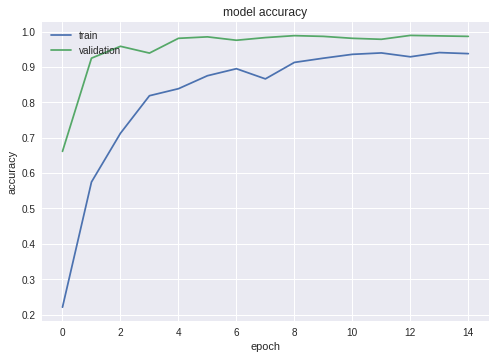

In [24]:
#summarize history for accuracy
plt.plot(loss_acc.history['acc'])
plt.plot(loss_acc.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

<function matplotlib.pyplot.show>

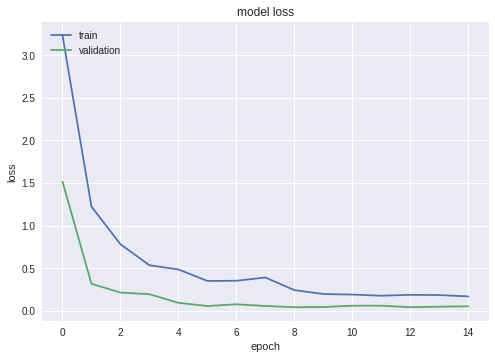

In [25]:
plt.plot(loss_acc.history['loss'])
plt.plot(loss_acc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show